# Survival Analysis on IBM Dataset

#### [Kaggle Dataset - IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [103]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [104]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [105]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [106]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [107]:
# We can see that employee count is 1 for all the rows in the column so I have will remove that column as it is not helpful in further analysis
# Employee Number is unique for each and every employee and is not very useful in Analysis.
# StandardHours is same for each employee and doesnt really help identify employee attrition.

(df['EmployeeCount'] == 1).sum()
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

In [108]:
for x in df.columns:
    if df[x].dtype == 'object':
        print(df[x].value_counts())
    else:
        print(f'{x}:  Min:- {min(df[x])}, Max:- {max(df[x])}')
    print('----------------------------------------------------------------------')

Age:  Min:- 18, Max:- 60
----------------------------------------------------------------------
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------------------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------------------------------------------
DailyRate:  Min:- 102, Max:- 1499
----------------------------------------------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------------------------------------------
DistanceFromHome:  Min:- 1, Max:- 29
----------------------------------------------------------------------
Education:  Min:- 1, Max:- 5
----------------------------------------------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing

In [109]:
# df.describe()
df[df.columns[:20]].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [110]:
df[df.columns[20:]].describe()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [119]:
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

In [120]:
new_df = df.copy()
for x in new_df.columns:
    if new_df[x].dtype == 'object':
        new_df[x] = LabelEncoder().fit_transform(new_df[x])

In [140]:
from sklearn.ensemble import RandomForestClassifier
X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

fig = px.histogram(feature_importance_df, y="Feature",x="Importance",width=600, height=600)
fig.show()

In [132]:
# Lets check how monltyIncome can affect attrition.
fig = px.histogram(df, x="MonthlyIncome",color='Attrition', marginal="violin",width=600, height=600, text_auto=True)
fig.show()

- As we can see in the above plot the attrition is more for employees which have a less income as compared to the employees having higher Income.

In [139]:
fig = px.histogram(df, x="Age", color='Attrition',marginal="box",width=600, height=600)
fig.show()

In [156]:
fig = px.histogram(df, x="NumCompaniesWorked", color='Attrition', marginal='violin',width=600, height=600)
fig.show()

# Kaplan Meier Survival Curve

- It is used to find the probability of survival over a period of time.

In [116]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = df['YearsAtCompany'], event_observed=df['Attrition'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1470 total observations, 1233 right-censored observations>

Text(0, 0.5, 'Porbability of Survival')

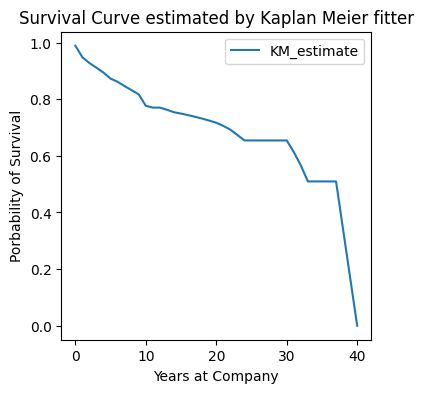

In [50]:
kmf.survival_function_.plot(figsize=(4,4))
plt.title('Survival Curve estimated by Kaplan Meier fitter')
plt.xlabel('Years at Company')
plt.ylabel('Porbability of Survival')

([<matplotlib.axis.YTick at 0x26cef09ef10>,
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

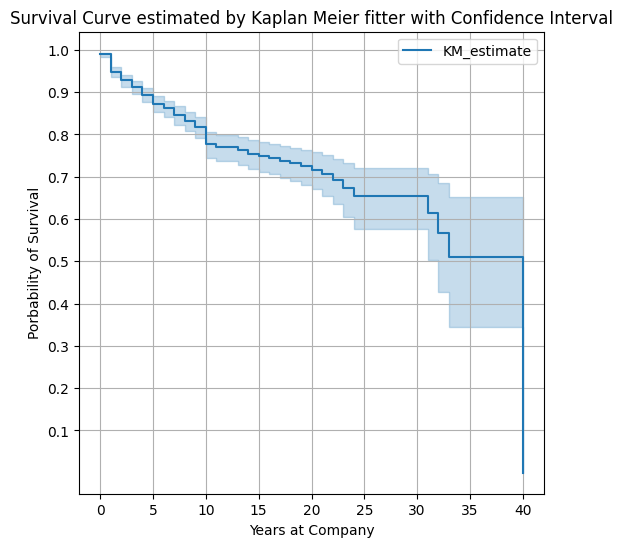

In [55]:
kmf.plot_survival_function(figsize=(6,6))
plt.title('Survival Curve estimated by Kaplan Meier fitter with Confidence Interval')
plt.xlabel('Years at Company')
plt.ylabel('Porbability of Survival')
plt.grid(visible=True)
plt.yticks(ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

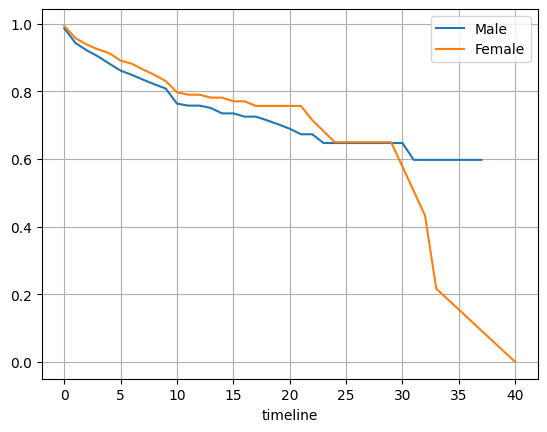

In [75]:
men_df = df[df['Gender']=='Male']
female_df = df[df['Gender']=='Female']

ax = plt.subplot()
men = kmf.fit(durations = men_df['YearsAtCompany'], event_observed=men_df['Attrition'], label='Male')
men.survival_function_.plot(ax=ax)

female = kmf.fit(durations = female_df['YearsAtCompany'], event_observed=female_df['Attrition'], label='Female')
female.survival_function_.plot(ax=ax)

ax.grid()

- We can observe that females have a higher probability of survival for upto the age of 30-32 after that the probability is really low. 
- But even if Males probability of surviving in the company is less as compared to Female, the Males have a higer probablitiy of staying at the same company after spending enough time at the same company. #


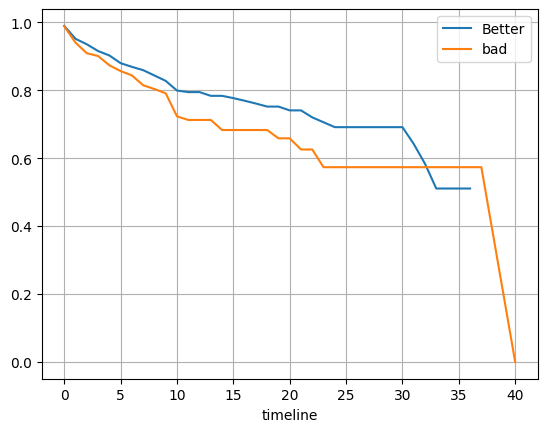

In [151]:
better_work_life = df[(df['WorkLifeBalance'] == 3) | (df['WorkLifeBalance'] == 4)]
bad_work_life = df[(df['WorkLifeBalance'] == 2) | (df['WorkLifeBalance'] == 1)]

ax = plt.subplot()
Better = kmf.fit(durations = better_work_life['YearsAtCompany'], event_observed= better_work_life['Attrition'], label='Better')
Better.survival_function_.plot(ax=ax)

bad = kmf.fit(durations = bad_work_life['YearsAtCompany'], event_observed= bad_work_life['Attrition'], label='bad')
bad.survival_function_.plot(ax=ax)

ax.grid()